## Dummy Q-learning algorithm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register
import random as pr

In [30]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

### make gym

In [3]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
env.render()

[2017-04-30 15:46:44,570] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG


### initialize table with all zeros

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

### set learning parameters

In [5]:
num_episodes = 2000

### algorithm

In [36]:
# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # q-table learning algorithm
    while not done:
        action = rargmax(Q[state, :])
        
        # get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # update q-table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
    rList.append(rAll)

### evaluate

success rate:  0.9705
final q-table values
left down right up
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


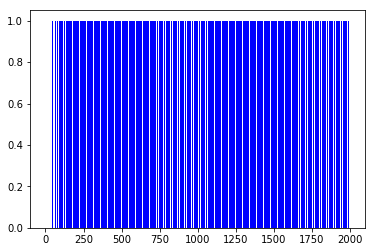

In [37]:
print('success rate: ', str(sum(rList)/num_episodes))
print('final q-table values')
print('left down right up')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()